# Youtube channel subscribers VS channel creation date

## Introduction

In this post, I'm going to answer a question that has been around for a while... and I'm going to do this using data from Atomic Media retrieval system (called atm Atomic Engine):

How important is being perseverant as a Youtuber?

A couple of years ago, one of [my friends](https://www.linkedin.com/in/pbsoto/) and partner came around with [this](https://medium.com/@luisdiazdeldedo/la-%C3%A9poca-de-los-mediocres-constantes-aa5903cd8d22#.wbsapbxhg) arguable Medium article (in Spanish) from Luis Díaz del Dedo, talking about how important was the 'age' of a Youtube channel for its success. At the end of the article the author stands that in spite of the quality of the content, the most important thing was being resilient and keep uploading videos week over week for years. 

One of the weakness of this article was that the author only give info about one particular channel, a well known success case over here: the spanish [youtuber](https://www.youtube.com/user/elrubiusOMG) with the highest number of subscribers atm.

As we have tons of data about Youtube Channels in our database, we can extend this analysis and incorporate data from a large number of channels in order to prove if channel creation date is related to some extent with channel number of subscribers.

Let's get started...

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(context = 'paper', style = 'darkgrid', font_scale=2)
%matplotlib inline

## Data preparation
First of all, we load datasets of static (do not change over time) and dynamic (change over time) data into memory and filter this data to keep only the most recent records (we also use dynamic data to analyze the evolution of channels and video over time and identify patterns).

In [49]:
channels = pd.read_pickle('data/channels.pickle')
channels_ts = pd.read_pickle('data/channels_ts.pickle') #ts is the acronym for timeseries

In [50]:
# Filter channel_ts info and last only most recent entries
list_of_indexes = [np.argmax(g['eng_fh_date']) for l, g in channels_ts.groupby('eng_id_channel')]

# Generates a full channels dataset merging static and dynamic data.
full_channels = channels.merge(channels_ts.ix[list_of_indexes], how='left')

This is how the first rows of our Data Frame looks up to this point:

In [51]:
full_channels.head()

,eng_id_channel,eng_fh_lastupdate,eng_fh_creationdate,eng_js_topicids,eng_fh_updatedrelated,eng_fh_updatedvideos,eng_id_allvidplaylist,eng_fh_date,eng_nu_totalviews,eng_nu_subscribers,eng_nu_totalvideos,eng_tx_title,eng_tx_keywords,eng_tx_description,eng_js_related,eng_nu_totalcomments
0,UCk9gPdY4fbH0BRhyTio9XIg,2017-02-10 08:47:24.058337,2006-06-23 14:58:55,"[/m/01mw1, /m/013f7bmb, /m/02dpv4, /m/03bt1gh,...",2017-02-02 23:31:07.896056,2017-02-10 08:47:53.621198,UUk9gPdY4fbH0BRhyTio9XIg,2017-02-10 08:47:24.058337,15428886.0,88510.0,496.0,DamnNoHtml,cry spoon bye funny humor deadpan Dark Souls P...,"Hi there, I am Scott!\n\nI play video games. A...","[UC73Us1H9hxv__5oobyLDOyw, UCxW2Le1cFAD14KP1k9...",233.0
1,UCap97Ue8K_BpKlrvQRYd6JA,2017-02-10 08:47:34.084422,2011-12-02 05:26:55,"[/m/04rh6b, /m/0bqtd, /m/032tl, /m/019_rr]",2017-02-02 23:02:50.612256,2017-02-10 08:48:03.193162,UUap97Ue8K_BpKlrvQRYd6JA,2017-02-10 08:47:34.084422,354456872.0,5056065.0,373.0,LaurDIY,"DIY ""how to's"" tutorials beauty hair","HI BABES! I'm Lauren, your DIY-obsessed bestie...","[UC3-HdcyKSJv6YqIuGxiY2Qw, UC73Km9IHhumn8S6zJt...",112.0
2,UC0vKbQS7N-ptdKJacKnVrYg,2017-02-10 08:54:30.196930,2008-05-16 03:52:24,"[/m/032tl, /m/04rh6b, /m/019_rr, /m/032tl, /m/...",2017-02-11 00:25:14.372854,2017-02-10 19:06:44.583540,UU0vKbQS7N-ptdKJacKnVrYg,2017-02-10 08:54:30.196930,337818.0,6117.0,85.0,Gina Gaus,Gina Gaus Girl Ginaandjuice Omgginalol,20-something professional cosmetologist/colleg...,[UC4Dl86zu47Hs_p7SgU_hzcg],183.0
3,UCzQMI4gtB50HUYAZIa2z-Hg,2017-02-10 08:47:31.538011,2013-12-03 19:00:12,"[/m/04w8jw, /m/0hgnzjh, /m/019_rr, /m/0bzvm2]",2017-02-02 23:29:39.241409,2017-02-10 08:48:21.811929,UUzQMI4gtB50HUYAZIa2z-Hg,2017-02-10 08:47:31.538011,59546024.0,684756.0,274.0,iamSanna,"Challenges Entertainment Vlogs TAG Q&A ""long d...",Hey! \n\nMy name is Sanna and i make a lot of ...,"[UC0DZmkupLYwc0yDsfocLh0A, UCyQVt6PHgeW2kmh7mY...",0.0
4,UC3uiC_QlVkqMlk2mFCDUpHw,2017-02-10 08:47:41.127038,2008-01-24 06:46:17,"[/m/014trl, /m/04rh6b, /m/019_rr, /m/032tl, /m...",2017-02-02 23:32:23.331141,2017-02-10 08:48:12.539409,UU3uiC_QlVkqMlk2mFCDUpHw,2017-02-10 08:47:41.127038,6218823.0,72538.0,400.0,chrissstttiiine,christine mai nguyen,"Los Angeles, CA\nI've been on YouTube for almo...","[UCDwOgSAnSHFVN_1mc2dHMyw, UCuOShJFeXUWJg-o-ks...",361.0


From this DataFrame we are only going to use the columns we're interested in: 'eng_fh_creationdate' and 'eng_nu_subscribers'. There should not be nan values in those columns to avoid problems creating a linear model and plotting it.

In order to keep only 'successfull' channels, we can filter only those channels with, let's say... above 500,000 subscribers up to date. To avoid 'extreme successfull' channels, we should also filter those channels above 50,000,000 subscribers (better said... that channel, because there is only one youtuber with such a brutal amount of subscribers and he is PewDiePie).

In [52]:
channels_subset = full_channels.dropna(subset=['eng_fh_creationdate', 'eng_nu_subscribers'])
channels_subset = channels_subset[['eng_fh_creationdate', 'eng_nu_subscribers']]
channels_filtered = channels_subset[channels_subset['eng_nu_subscribers'] > 500000]
channels_filtered = channels_filtered[channels_filtered['eng_nu_subscribers'] < 50000000]

This is how the very first rows of our Data Frame looks up to this point

In [53]:
channels_filtered.head()

,eng_fh_creationdate,eng_nu_subscribers
1,2011-12-02 05:26:55,5056065.0
3,2013-12-03 19:00:12,684756.0
5,2012-05-26 20:30:52,16479753.0
7,2007-09-19 04:26:36,8038953.0
9,2011-01-28 01:20:05,1276510.0


Now, we have to make some transformation to this data:

* Seaborn linear model graph do not accept dates as an imput, so we must transform date column to a continuous value in order to feed it to the plotting function.
* We can convert subscribers column into millions of subscribers to make it easier to read.


In [54]:
x = channels_filtered['eng_fh_creationdate'].values
x = (x.astype('uint64') / 1e9) /  31556926 + 1970 #To years
y = channels_filtered['eng_nu_subscribers']/1e6

## Plotting
And now, we can plot the results, previously defining a function that calculates $R^2$

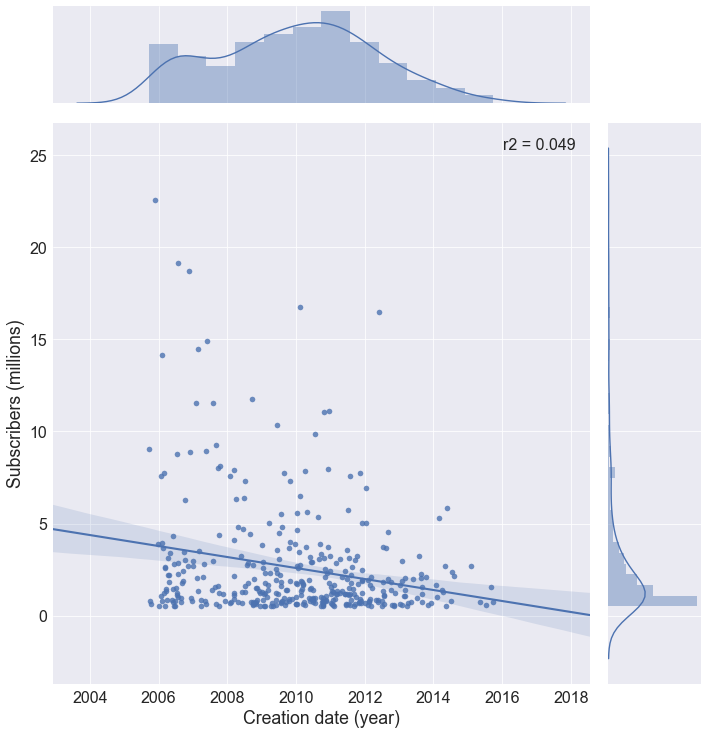

In [55]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

g = sns.jointplot(x, y, kind="reg", stat_func=r2, size=10)
g.set_axis_labels('Creation date (year)', 'Subscribers (millions)')

## Results

How conclusive are the results? There is obviously a negative slope in the graph, but does not look extremely pronounced although it ranges from about 4 millions subscribers to 1 million for the most recent channels. Also, we should not be mistaken about what we see... points are not equally distributed around the grid, and what is most important, $R^2$ is about 0.05, what means that only 5% of variance can be explained due to the creation date, which, is simple words means that there is not a clear relationship between these two variables.

We have to remember also that we have previously filtered channels with less than 500,000 subscribers (a void area in the bottom of the graph is clearly visible).

What happens with all those sub 500,000 channels? This is only an advance of what me and my colleages are working on at Atomic Media at this moment. Keep and eye on this blog because I will go deeper and deeper in those topics (and others) in the next days and months.

And of course, we are humans! And humans make mistakes. If you see mistakes or erratum in this post, you can contact me via mail of twitter (located in the bottom of this web).